In [1]:
import numpy as np
import collections
import os
import pickle

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from mrashpen.inference.mrash_wrapR import MrASHR

In [2]:
itrtime_pklfile = 'time_per_iteration.pkl'
itrtime_plotprefix = 'time_per_iteration'

In [8]:
np.random.seed(100)

dims = np.power(2, 7 + np.arange(9))
data = dict()
degree = 0
nknots = 10
strue  = 0.1
knots  = np.linspace(0, 1, nknots+2)[1:-1]

In [9]:
dims

array([  128,   256,   512,  1024,  2048,  4096,  8192, 16384, 32768])

In [5]:
for i, n in enumerate(dims):
    x = np.linspace(0, 1, n)
    data[i] = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                    signal = "normal", seed = 100,
                    include_intercept = False)

128
256
512
1024
2048
4096
8192
16384
32768


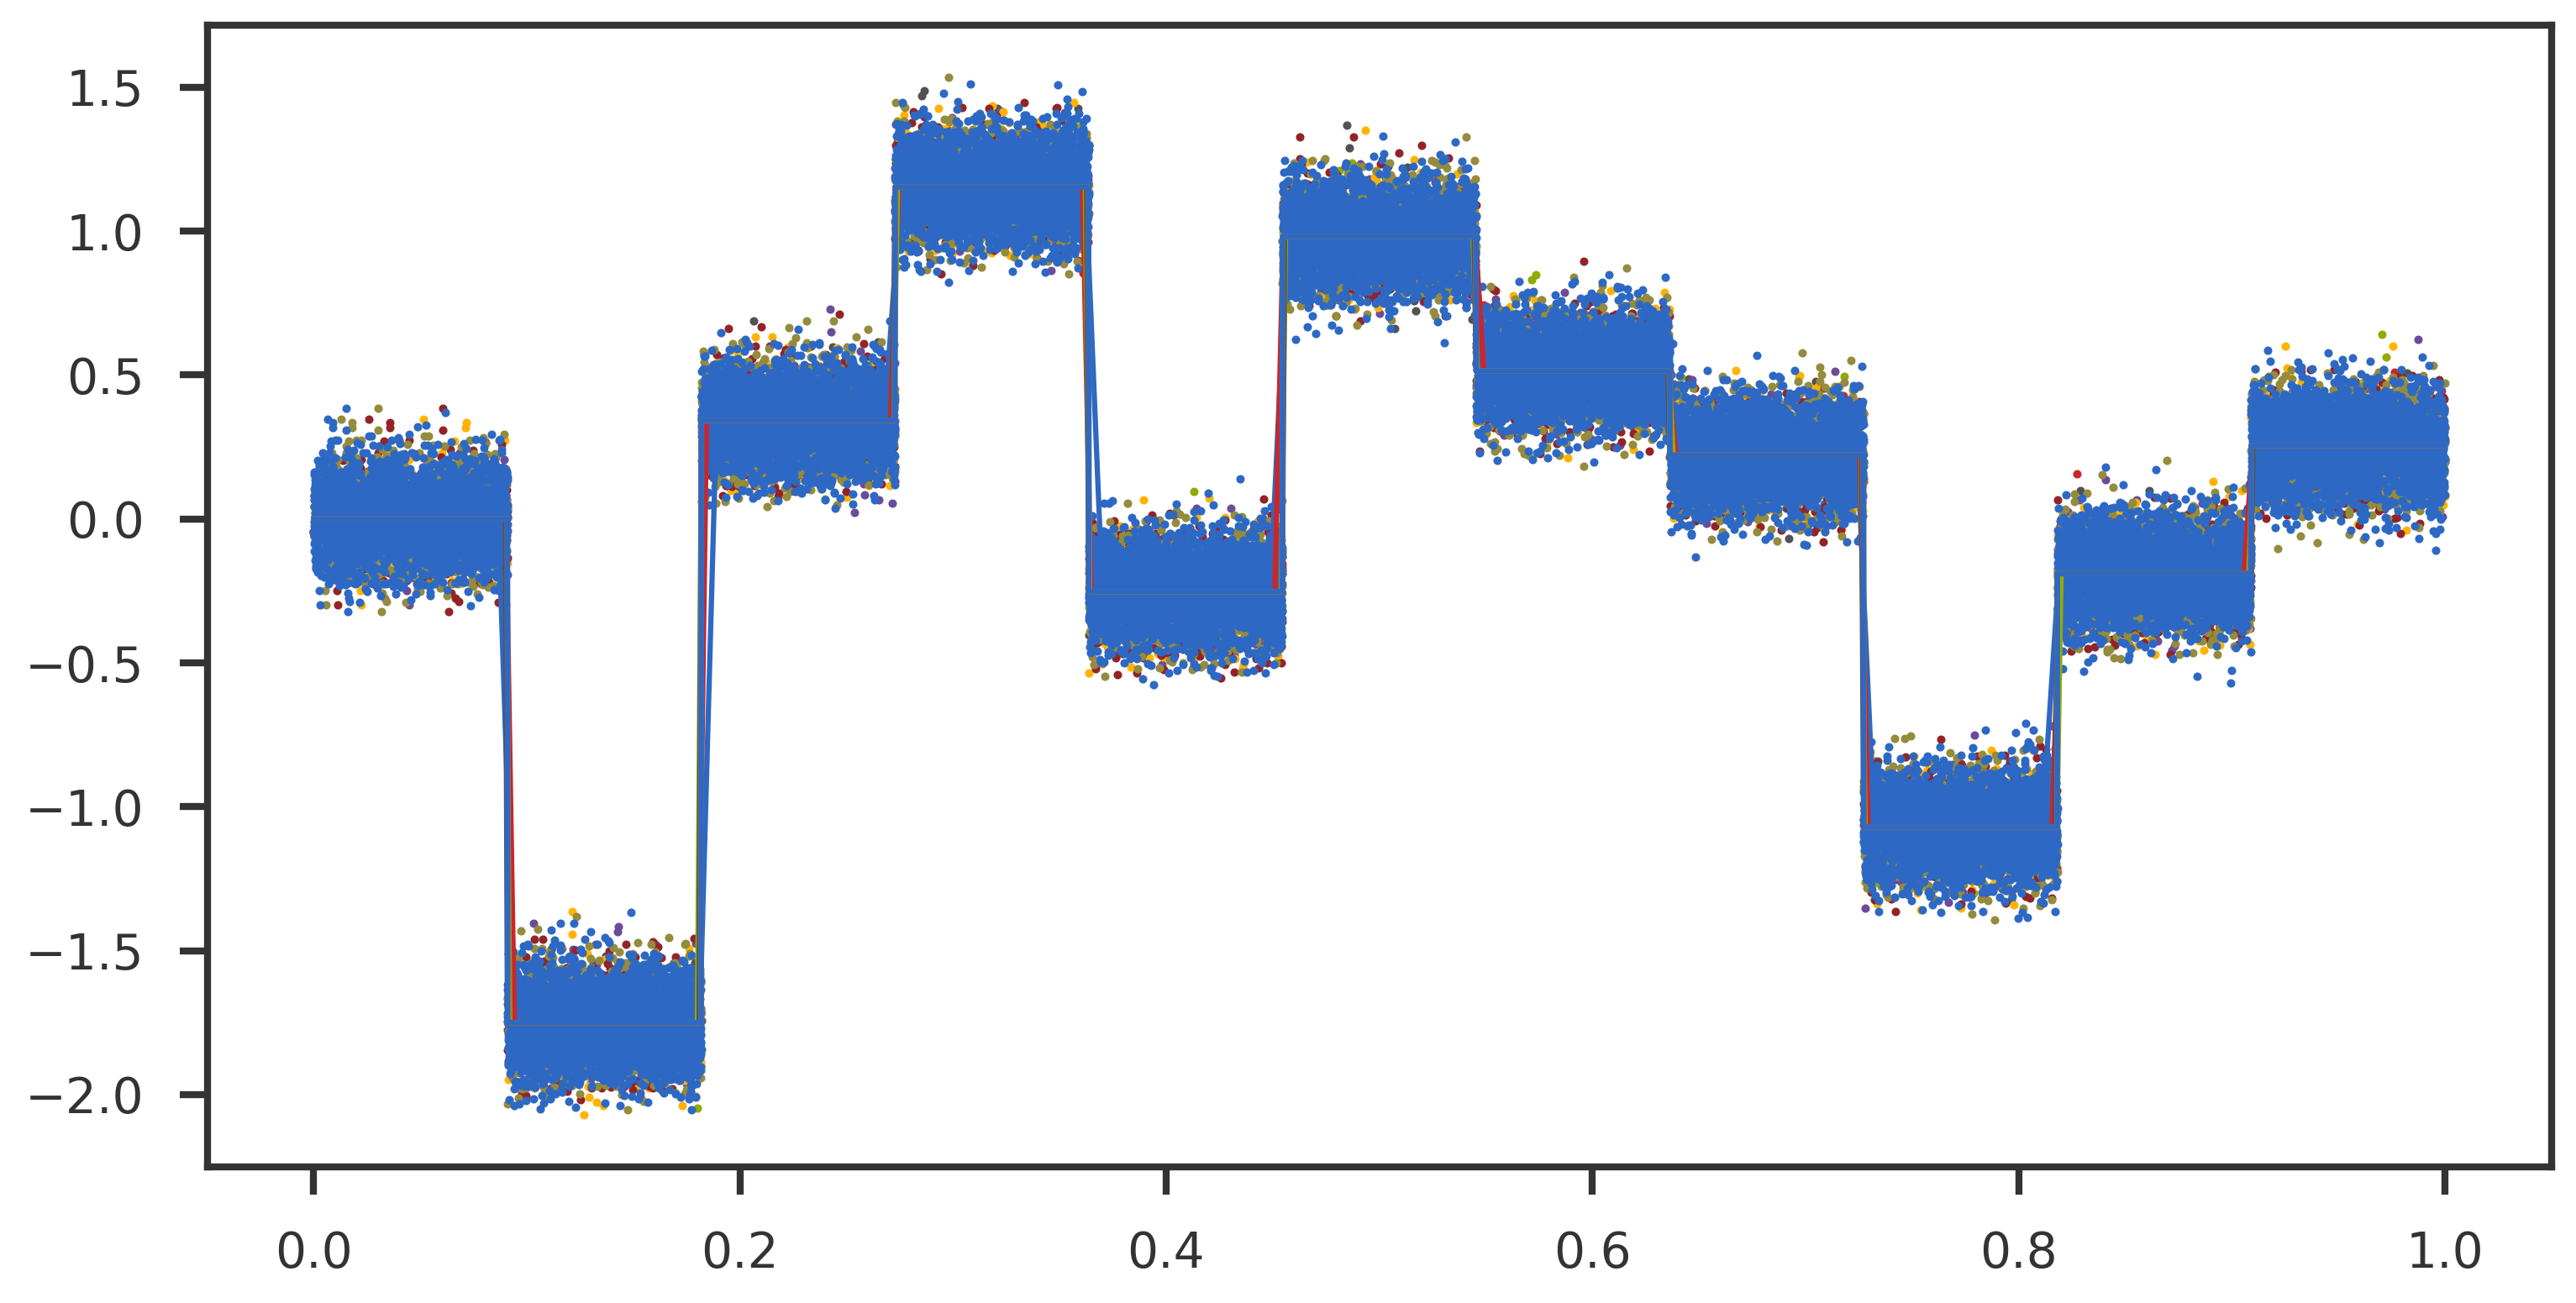

In [6]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

for i, n in enumerate(dims):
    print(data[i].y.shape[0])
    ax1.scatter(data[i].x, data[i].y, s = 2)
    ax1.plot(data[i].x, data[i].ytrue)
plt.show()

In [7]:
prior = toy_priors.get_ash_scaled(k = 20, sparsity = 0.9, skbase = 20)
if os.path.isfile(itrtime_pklfile):
    with open(itrtime_pklfile, 'rb') as handle:
        itrtime = pickle.load(handle)
else:
    itrtime = dict()

In [8]:
if 'gv' in locals() and isinstance(gv, dict):
    print("Old runs exist.")
else:
    gv = dict()

if 'gradvi' not in itrtime.keys(): itrtime['gradvi'] = dict()

    
for i, n in enumerate(dims):
    if n < 20000:
        if i not in itrtime['gradvi'].keys():
            if i not in gv.keys():
                gv[i] = LinearRegression(obj = 'reparametrize', maxiter = 200)
                gv[i].fit(data[i].H, data[i].y, prior)
            itrtime['gradvi'][i] = gv[i]._res.optim_time / gv[i].nfev
            print(f"GradVI used {gv[i].nfev} function evaluations.")
        print (n, itrtime['gradvi'][i])

GradVI used 46 function evaluations.
128 0.0016492035077965777
GradVI used 258 function evaluations.
256 0.0018380168796509736
GradVI used 335 function evaluations.
512 0.002840941699583139
GradVI used 392 function evaluations.
1024 0.006654359856430365


/home/saikat/Documents/work/sparse-regression/gradvi/src/gradvi/normal_means/nm_ash.py:219: RuntimeWarning: overflow encountered in exp
  self._logML_wderiv = np.exp(- 0.5 * np.log(2 * np.pi) + self.logLjk() - self.logML.reshape(self._n, 1))
/home/saikat/Documents/work/sparse-regression/gradvi/src/gradvi/normal_means/nm_ash.py:235: RuntimeWarning: overflow encountered in multiply
  self._logML_deriv_wderiv = - self.logML_wderiv \
/home/saikat/Documents/work/sparse-regression/gradvi/src/gradvi/normal_means/nm_base.py:87: RuntimeWarning: overflow encountered in multiply
  v2_ld_ldwd = self.yvar.reshape(-1, 1) * self.logML_deriv.reshape(-1, 1) * self.logML_deriv_wderiv
/home/saikat/Documents/work/sparse-regression/gradvi/src/gradvi/normal_means/nm_base.py:88: RuntimeWarning: invalid value encountered in subtract
  l_wgrad = - self.logML_wderiv - v2_ld_ldwd


GradVI used 159 function evaluations.
2048 0.010587869200316615
GradVI used 335 function evaluations.
4096 0.02534875656241801
GradVI used 343 function evaluations.
8192 0.08041572779330151
GradVI used 33 function evaluations.
16384 0.20964411533240115


In [11]:
if 'cavi' in locals() and isinstance(cavi, dict):
    print("Old runs exist.")
else:
    cavi = dict()

if 'cavi' not in itrtime.keys(): itrtime['cavi'] = dict()

for i, n in enumerate(dims):
    if n < 20000:
        if i not in itrtime['cavi'].keys():
            if i not in cavi.keys():
                cavi[i] = MrASHR(option = "rds", debug = False)
                cavi[i].fit(data[i].H, data[i].y, prior.sk, winit = prior.w, binit = np.zeros(n), maxiter = 500)
            itrtime['cavi'][i] = cavi[i].fitobj['run_time'] / cavi[i].niter
            print(f"CAVI used {cavi[i].niter} iterations.")
        print(n, itrtime['cavi'][i])

Old runs exist.
128 0.0018411650657653808
256 0.0019622835245999425
2022-11-08 16:17:16,400 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 334.

CAVI used 334 iterations.
512 0.0029674254491657555
2022-11-08 16:17:18,775 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 500.

CAVI used 500 iterations.
1024 0.003650146961212158
2022-11-08 16:17:24,923 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 500.

CAVI used 500 iterations.
2048 0.01014728593826294
2022-11-08 16:17:45,172 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 500.

CAVI used 500 iterations.
4096 0.03428911685943604
2022-11-08 16:18:58,542 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 500.

CAVI used 500 iterations.
8192 0.12121003198623657
2022-11-08 16:23:44,709 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 500.

CAVI used 500 iterations.
16384 0.480616352558136


In [ ]:
if 'gvtf' in locals() and isinstance(gvtf, dict):
    print("Old runs exist.")
else:
    gvtf = dict()

if 'gradvi_tf' not in itrtime.keys(): itrtime['gradvi_tf'] = dict()

for i, n in enumerate(dims):
    if n not in itrtime['gradvi_tf'].keys():
        if n not in gvtf.keys():
            gvtf[n] = Trendfiltering(maxiter = 200, scale_tfbasis = False)
            gvtf[n].fit(data[i].y, degree, prior)
        itrtime['gradvi_tf'][n] = gvtf[n]._res.optim_time / gvtf[n].nfev
        print(f"GradVI used {gvtf[n].nfev} function evaluations.")
    print (n, itrtime['gradvi_tf'][n])

GradVI used 64 function evaluations.
128 0.0018104389309883118
GradVI used 255 function evaluations.
256 0.00239100830227721
GradVI used 301 function evaluations.
512 0.0037544644948255975
GradVI used 302 function evaluations.
1024 0.004771942334459317
GradVI used 299 function evaluations.
2048 0.00865815156279599
GradVI used 261 function evaluations.
4096 0.022571567374627708
GradVI used 241 function evaluations.
8192 0.031577326944754826
GradVI used 243 function evaluations.
16384 0.07051065625477229


In [11]:
if 'gvtfsc' in locals() and isinstance(gvtfsc, dict):
    print("Old runs exist.")
else:
    gvtfsc = dict()

if 'gradvi_tf_scaled' not in itrtime.keys(): itrtime['gradvi_tf_scaled'] = dict()

for i, n in enumerate(dims):
    if n not in itrtime['gradvi'].keys():
        if n not in gv.keys():
            gvtfsc[n] = Trendfiltering(maxiter = 200, scale_tfbasis = True)
            gvtfsc[n].fit(data[i].y, degree, prior)
        itrtime['gradvi_tf_scaled'][n] = gvtfsc[n]._res.optim_time / gvtfsc[n].nfev
        print(f"GradVI used {gvtfsc[n].nfev} function evaluations.")
    print (n, itrtime['gradvi_tf_scaled'][n])

128 0.00155927385053327
256 0.0022718861417950326
512 0.0038064286328744197
1024 0.004671115669415152
2048 0.008918215031824807
4096 0.018760432646824764
8192 0.041556069880356025
16384 0.11593743063445784


In [12]:
if 'gvdirtf' in locals() and isinstance(gvdirtf, dict):
    print("Old runs exist.")
else:
    gvdirtf = dict()

if 'gradvi_direct_tf' not in itrtime.keys(): itrtime['gradvi_direct_tf'] = dict()

for i, n in enumerate(dims):
    if n < 10000:
    if n not in itrtime['gradvi_direct_tf'].keys():
        if n not in gvdirtf.keys():
            gvdirtf[i] = Trendfiltering(maxiter = 200, scale_tfbasis = False, obj = 'direct')
            gvdirtf[i].fit(data[i].y, degree, prior)
        itrtime['gradvi_direct_tf'][i] = gvdirtf[i]._res.optim_time / gvdirtf[i].nfev
        print(f"GradVI used {gvdirtf[i].nfev} function evaluations.")
    print (n, itrtime['gradvi_direct_tf'][i])

128 0.01600015578062638
256 0.02270541340112686
512 0.035415895595106966
1024 0.06183885279155913
2048 0.11180229209610636
4096 0.22183790071955267
8192 0.472172557203858
16384 1.2288755994094045


In [13]:
if 'gvdirtfsc' in locals() and isinstance(gvdirtfsc, dict):
    print("Old runs exist.")
else:
    gvdirtfsc = dict()

if 'gradvi_direct_tf_scaled' not in itrtime.keys(): itrtime['gradvi_direct_tf_scaled'] = dict()

for i, n in enumerate(dims):
    if i not in itrtime['gradvi_direct_tf_scaled'].keys():
        if i not in gvdirtfsc.keys():
            gvdirtfsc[i] = Trendfiltering(maxiter = 200, scale_tfbasis = True, obj = 'direct')
            gvdirtfsc[i].fit(data[i].y, degree, prior)
        itrtime['gradvi_direct_tf_scaled'][i] = gvdirtfsc[i]._res.optim_time / gvdirtfsc[i].nfev
        print(f"GradVI used {gvdirtfsc[i].nfev} function evaluations.")
    print (n, itrtime['gradvi_direct_tf_scaled'][i])

128 0.0077858080058337345
256 0.008749229098678729
512 0.01067325878591045
1024 0.013945623806544712
2048 0.020178493999299548
4096 0.034714954159271096
8192 0.061989507036345995
16384 0.1387145239422579


In [14]:
import pickle

with open('time_per_iteration.pkl', 'wb') as pkl_handle:
    pickle.dump(itrtime, pkl_handle, protocol = pickle.HIGHEST_PROTOCOL)

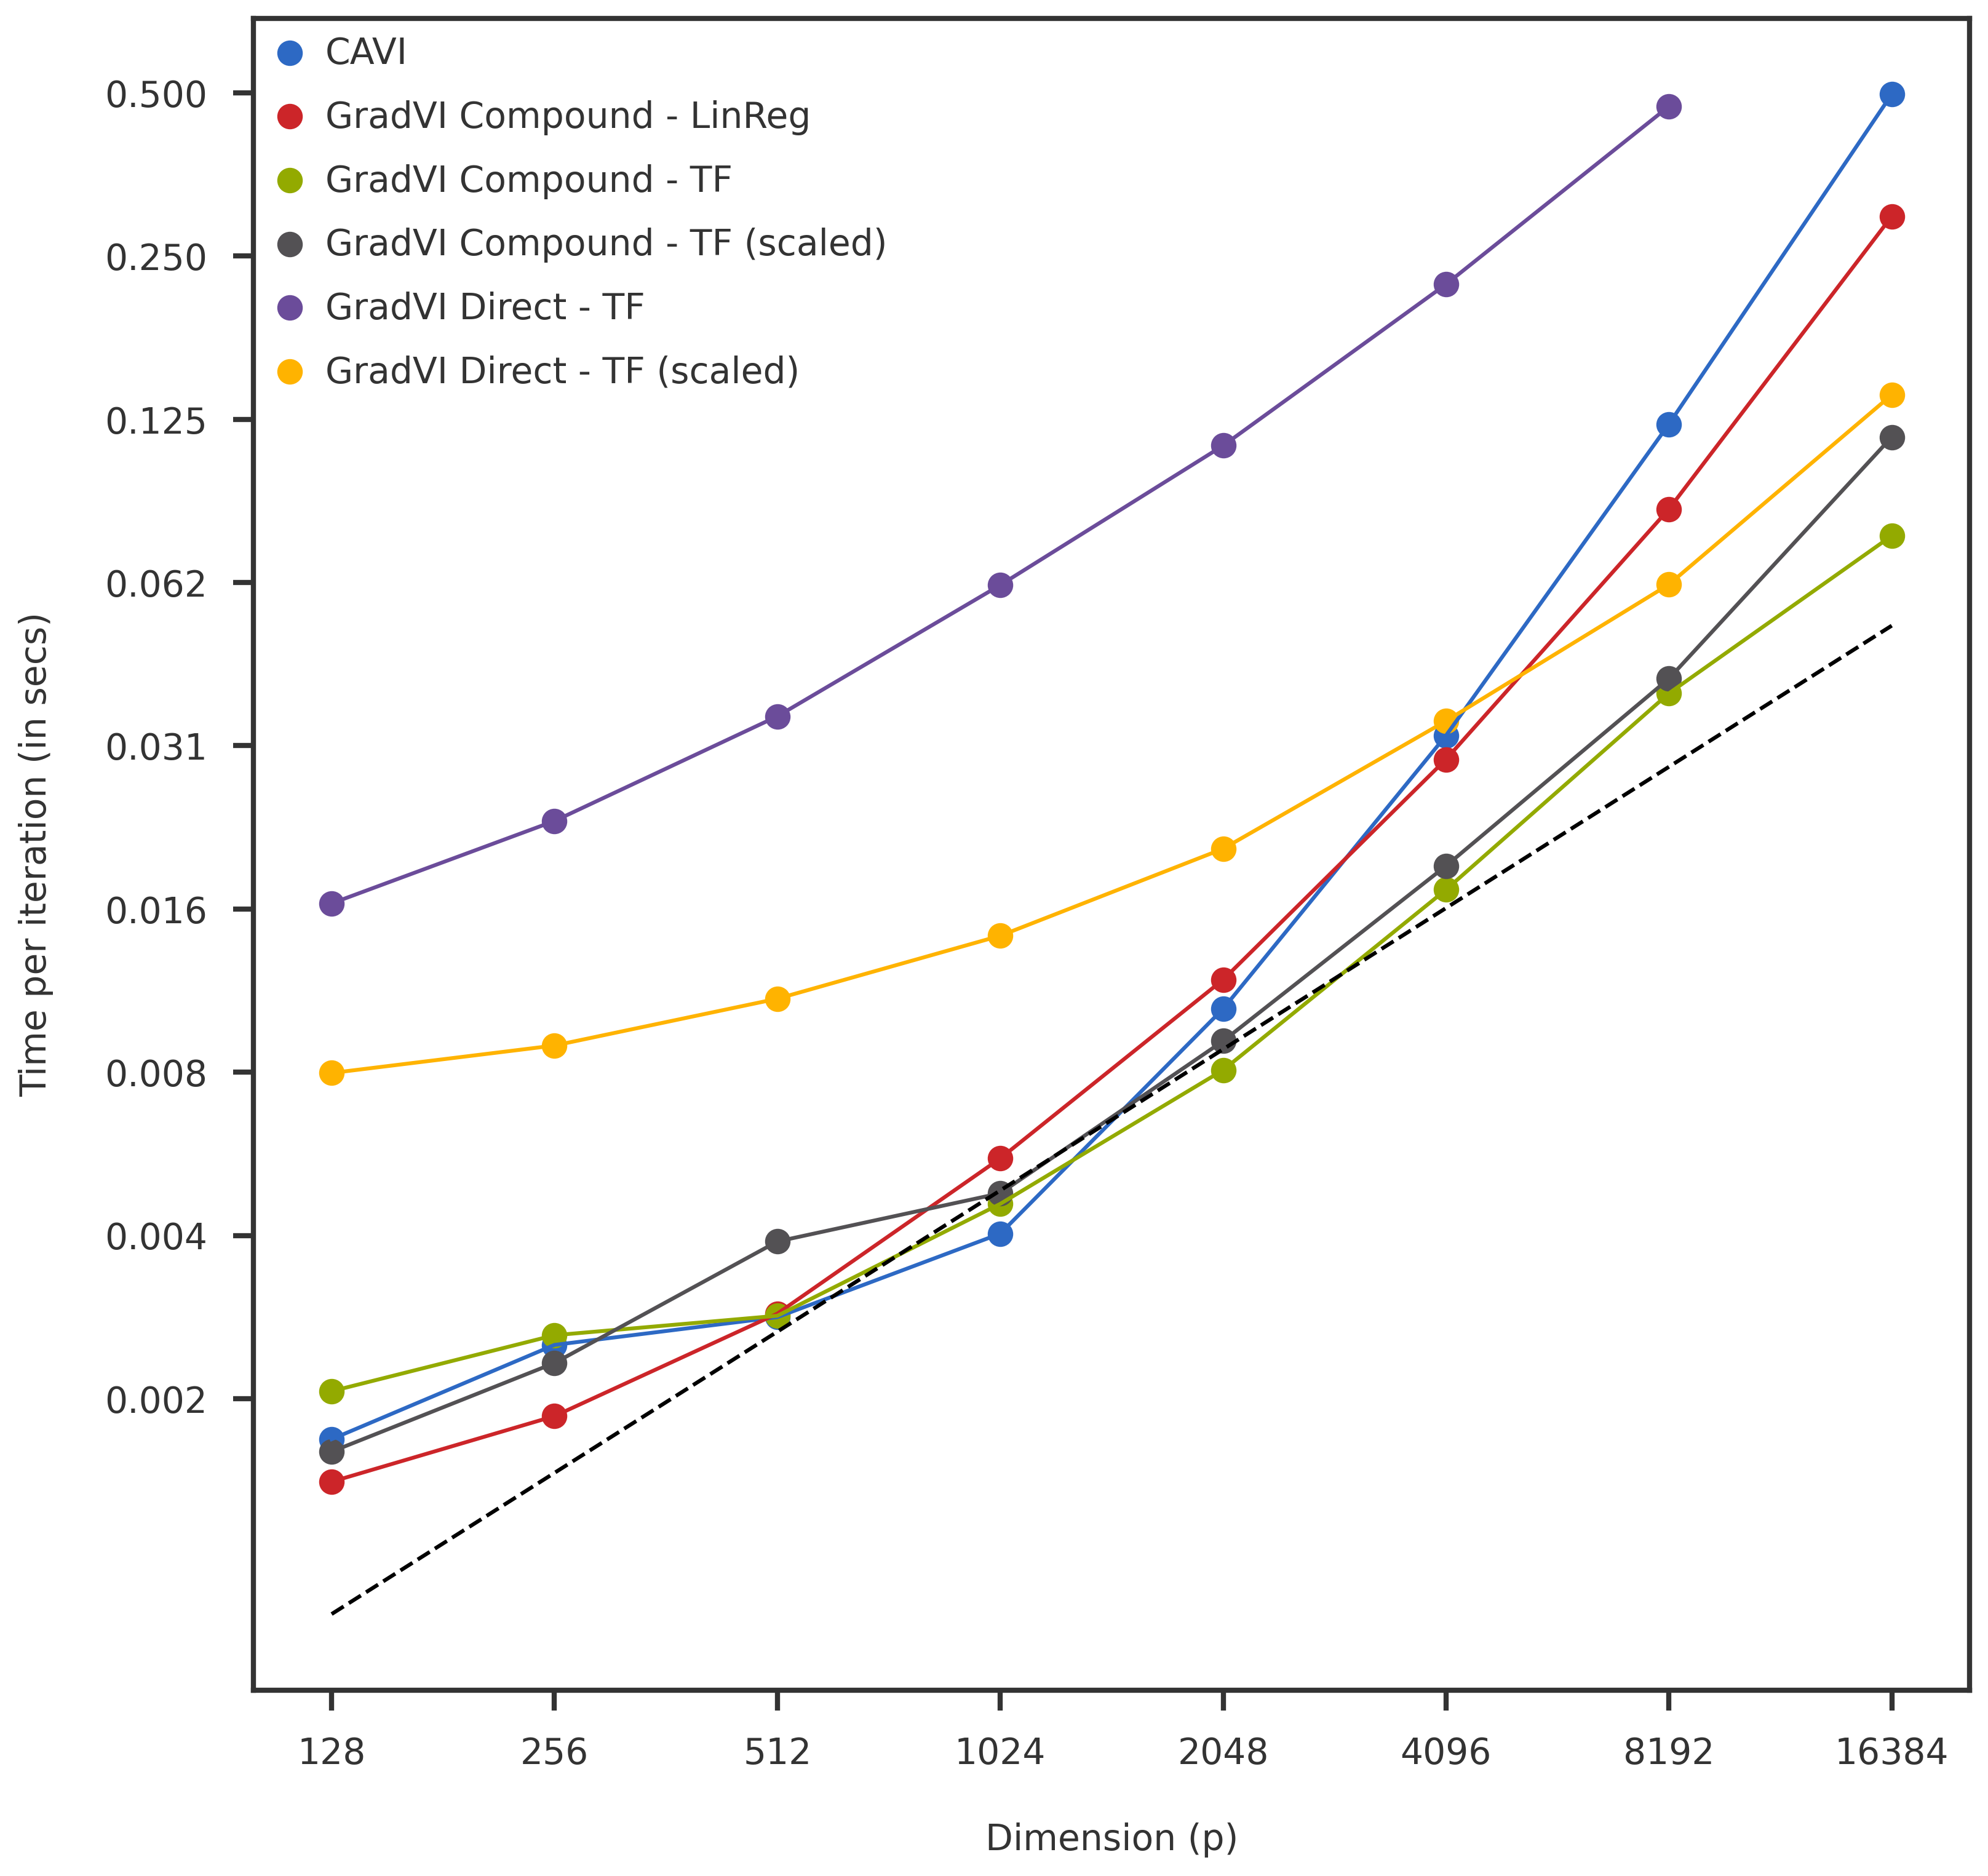

In [90]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111)

def get_xy(itrtime, method):
    mdict = itrtime[method]
    x = np.array(list(mdict.keys()))
    y = np.array(list(mdict.values()))
    return x, y

def plot_func(ax, x, y, label = ''):
    ax.scatter(np.log2(x), np.log2(y), label = label, s = 80)
    ax.plot(np.log2(x), np.log2(y))
    return


def show_linear_scale(ax, dims, itrtime, method, imin = 2, imax = 4):
    yvals = np.array([itrtime[method][i] for i, n in enumerate(dims)])
    x = np.log2(dims[imin : imax + 1])
    y = np.log2(yvals[imin : imax + 1])
    linreg = linregress(x, y)
    ylinreg = linreg.intercept + linreg.slope * np.log2(dims)
    ax.plot(np.log2(dims), ylinreg, ls = 'dashed', color = 'black')
    return
    

xvals, yvals = get_xy(itrtime, 'cavi')
plot_func(ax1, dims, yvals, label = 'CAVI')

xvals, yvals = get_xy(itrtime, 'gradvi')
plot_func(ax1, dims, yvals, label = 'GradVI Compound - LinReg')

xvals, yvals = get_xy(itrtime, 'gradvi_tf')
plot_func(ax1, dims, yvals, label = 'GradVI Compound - TF')

xvals, yvals = get_xy(itrtime, 'gradvi_tf_scaled')
plot_func(ax1, dims, yvals, label = 'GradVI Compound - TF (scaled)')

xvals, yvals = get_xy(itrtime, 'gradvi_direct_tf')
skip  = 1
plot_func(ax1, dims[:-skip], yvals[:-skip], label = 'GradVI Direct - TF')

xvals, yvals = get_xy(itrtime, 'gradvi_direct_tf_scaled')
plot_func(ax1, dims, yvals, label = 'GradVI Direct - TF (scaled)')

mpl_utils.set_yticks(ax1, scale = 'log2', spacing = 'log2',  kmin = 5, kmax = 10, fmt = '{:.3f}')
mpl_utils.set_xticks(ax1, scale = 'log2', spacing = 'log2',  kmin = 5, fmt = '{:.0f}')
#mpl_utils.set_ymax(ax1, 0.6, scale = 'log2')

show_linear_scale(ax1, dims, itrtime, 'gradvi_tf', imin = 2, imax = 5)

ax1.legend()
ax1.set_ylabel("Time per iteration (in secs)")
ax1.set_xlabel("Dimension (p)")

#fig.savefig(f"{itrtime_plotprefix}.pdf", bbox_inches = 'tight')
plt.show()

In [73]:
from scipy.stats import linregress
yvals = np.array([itrtime['gradvi_tf'][i] for i, n in enumerate(dims)])

linreg = linregress(np.log2(dims[2:5]), np.log2(yvals[2:5]))

In [74]:
linreg

LinregressResult(slope=0.7526832698279396, intercept=-15.288934555440338, rvalue=0.9986722971641547, pvalue=0.03280904771229127, stderr=0.03882491360138196, intercept_stderr=0.38954115002086825)

In [75]:
linreg.slope

0.7526832698279396

In [76]:
linreg.intercept

-15.288934555440338